# Personalización de leyendas de gráficos

Las leyendas de la trama dan significado a una visualización, asignando significado a los diversos elementos de la trama.
Anteriormente vimos cómo crear una leyenda simple; aquí veremos cómo personalizar la ubicación y la estética de la leyenda en Matplotlib.
La leyenda más simple se puede crear con el comando ``plt.legend()``, que crea automáticamente una leyenda para cualquier elemento de trazado etiquetado:

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [ ]:
%matplotlib inline
import numpy as np

In [ ]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

Pero hay muchas formas en las que podríamos querer personalizar dicha leyenda.
Por ejemplo, podemos especificar la ubicación y apagar el marco:

In [ ]:
ax.legend(loc='upper left', frameon=False)
fig

Podemos usar el comando ``ncol`` para especificar el número de columnas en la leyenda:

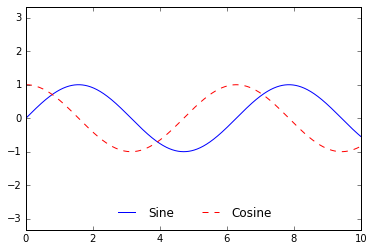

In [ ]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

Podemos usar un cuadro redondeado (``fancybox``) o agregar una sombra, cambiar la transparencia (valor alfa) del marco o cambiar el relleno alrededor del texto:

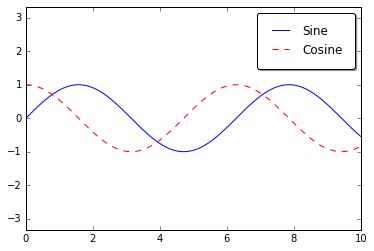

In [ ]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

Para obtener más información sobre las opciones de leyenda disponibles, consulte la cadena de documentación ``plt.legend``.

## Elección de elementos para la leyenda
Como ya hemos visto, la leyenda incluye todos los elementos etiquetados por defecto.
Si esto no es lo que se desea, podemos ajustar con precisión qué elementos y etiquetas aparecen en la leyenda usando los objetos devueltos por los comandos de trazado.
El comando ``plt.plot()`` puede crear varias líneas a la vez y devuelve una lista de las instancias de línea creadas.
Pasar cualquiera de estos a ``plt.legend()`` le dirá cuál identificar, junto con las etiquetas que nos gustaría especificar:

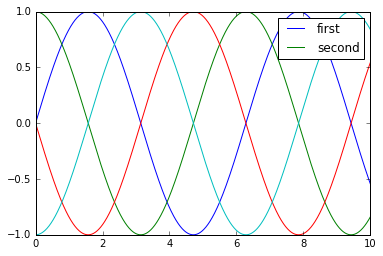

In [ ]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

Generalmente encuentro en la práctica que es más claro usar el primer método, aplicando etiquetas a los elementos de la trama que le gustaría mostrar en la leyenda:

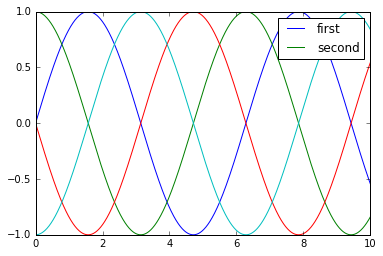

In [ ]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

Tenga en cuenta que, de forma predeterminada, la leyenda ignora todos los elementos sin un conjunto de atributos ``label``.

## Leyenda para el tamaño de los puntos
A veces, los valores predeterminados de la leyenda no son suficientes para la visualización dada.
Por ejemplo, tal vez esté utilizando el tamaño de los puntos para marcar ciertas características de los datos y desee crear una leyenda que refleje esto.
Aquí hay un ejemplo en el que usaremos el tamaño de los puntos para indicar las poblaciones de las ciudades de California.
Nos gustaría una leyenda que especifique la escala de los tamaños de los puntos, y lo lograremos trazando algunos datos etiquetados sin entradas:

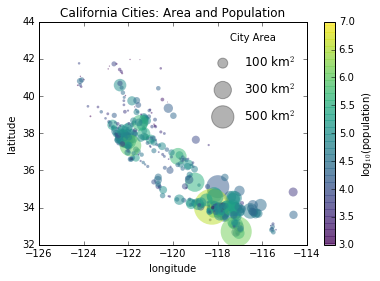

In [ ]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

La leyenda siempre hará referencia a algún objeto que esté en el gráfico, por lo que si deseamos mostrar una forma en particular, debemos trazarlo.
En este caso, los objetos que queremos (círculos grises) no están en el gráfico, por lo que los falsificamos trazando listas vacías.
Observe también que la leyenda solo enumera los elementos de la trama que tienen una etiqueta especificada.
Al trazar listas vacías, creamos objetos de trazado etiquetados que son recogidos por la leyenda, y ahora nuestra leyenda nos brinda información útil.
Esta estrategia puede ser útil para crear visualizaciones más sofisticadas.
Finalmente, tenga en cuenta que para datos geográficos como este, sería más claro si pudiéramos mostrar los límites estatales u otros elementos específicos del mapa.
Para esto, una excelente opción de herramienta es el kit de herramientas adicional de mapa base de Matplotlib, que exploraremos en [Datos geográficos con Basemap](04.13-Datos-geográficos-con-Basemap.ipynb).

## Múltiples Leyendas
A veces, al diseñar un gráfico, le gustaría agregar varias leyendas a los mismos ejes.
Desafortunadamente, Matplotlib no lo hace fácil: a través de la interfaz estándar ``leyenda``, solo es posible crear una sola leyenda para todo el gráfico.
Si intenta crear una segunda leyenda usando ``plt.legend()`` o ``ax.legend()``, simplemente anulará la primera.
Podemos solucionar esto creando un nuevo artista de leyenda desde cero y luego usando el método ``ax.add_artist()`` de nivel inferior para agregar manualmente el segundo artista a la trama:

In [ ]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

Este es un vistazo a los objetos de artista de bajo nivel que componen cualquier trama de Matplotlib.
Si examina el código fuente de ``ax.legend()`` (recuerde que puede hacer esto dentro del cuaderno de IPython usando ``ax.legend??``) verá que la función simplemente consiste en algunos lógica para crear un artista ``Legend`` adecuado, que luego se guarda en el atributo ``legend_`` y se agrega a la figura cuando se dibuja la trama.